In [2]:
from tensorflow import keras
from keras.datasets import fashion_mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Few pixel values BEFORE normalization: \n", train_images[0, 20:26, 20:26])
train_images = train_images / 255.0
test_images = test_images / 255.0
print("\nFew pixel values AFTER normalization: \n", train_images[0, 20:26, 20:26])

Few pixel values BEFORE normalization: 
 [[218 212 209 222 220 221]
 [186 181 177 172 181 205]
 [198 192 176 156 167 177]
 [211 188 188 194 192 216]
 [181 176 166 168  99  58]
 [  0   0   0   0   0   0]]

Few pixel values AFTER normalization: 
 [[0.85490196 0.83137255 0.81960784 0.87058824 0.8627451  0.86666667]
 [0.72941176 0.70980392 0.69411765 0.6745098  0.70980392 0.80392157]
 [0.77647059 0.75294118 0.69019608 0.61176471 0.65490196 0.69411765]
 [0.82745098 0.7372549  0.7372549  0.76078431 0.75294118 0.84705882]
 [0.70980392 0.69019608 0.65098039 0.65882353 0.38823529 0.22745098]
 [0.         0.         0.         0.         0.         0.        ]]


In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/5
118/118 [==============================] - 1s 6ms/step - loss: 0.6464 - accuracy: 0.7806 - val_loss: 0.5080 - val_accuracy: 0.8236
Epoch 2/5
118/118 [==============================] - 1s 5ms/step - loss: 0.4388 - accuracy: 0.8493 - val_loss: 0.4381 - val_accuracy: 0.8478
Epoch 3/5
118/118 [==============================] - 1s 5ms/step - loss: 0.3951 - accuracy: 0.8629 - val_loss: 0.4407 - val_accuracy: 0.8439
Epoch 4/5
118/118 [==============================] - 1s 5ms/step - loss: 0.3694 - accuracy: 0.8709 - val_loss: 0.3976 - val_accuracy: 0.8587
Epoch 5/5
118/118 [==============================] - 1s 5ms/step - loss: 0.3475 - accuracy: 0.8775 - val_loss: 0.3844 - val_accuracy: 0.8640


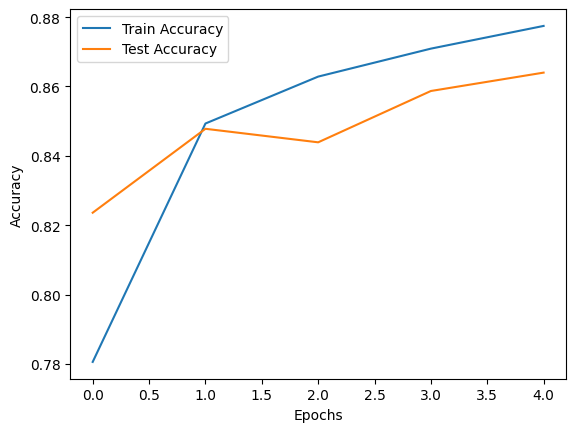

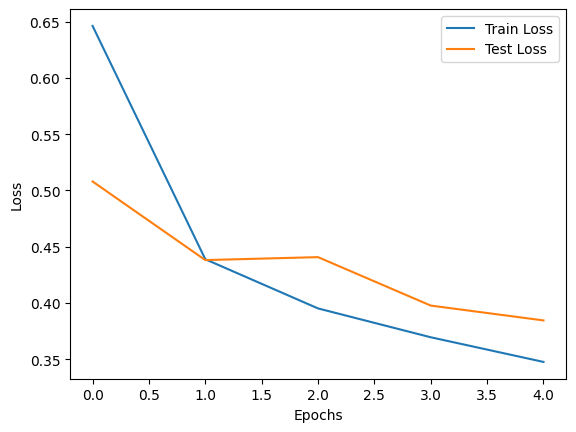

313/313 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8640
[0.3844248056411743, 0.8640000224113464]


In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size=512,
          validation_data=(test_images, test_labels))  ####!!!!!!!!!!!!!!!!!!!1

plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

rslts = model.evaluate(test_images, test_labels)
print(rslts)

In [6]:

result = model.predict(test_images.reshape(10000, 28, 28))
print(result)

model.save("my_model")
model = keras.models.load_model("my_model")

313/313 [==============================] - 0s 975us/step
[[1.85661920e-05 4.37696883e-07 1.41762075e-05 ... 1.00622661e-01
  2.50917813e-03 8.66215289e-01]
 [7.19208838e-05 2.53288750e-08 9.86854792e-01 ... 4.40223075e-12
  6.72976739e-06 2.44239160e-11]
 [1.05491214e-04 9.99831557e-01 7.20318758e-06 ... 5.89829030e-09
  3.14198047e-07 1.17626997e-09]
 ...
 [1.39538767e-02 2.91498327e-06 9.88887856e-04 ... 4.78074544e-05
  9.69292343e-01 4.13610763e-07]
 [1.45787508e-05 9.98900771e-01 2.40219724e-05 ... 1.57679736e-07
  1.28257341e-06 4.26349970e-07]
 [6.27735921e-04 1.73532229e-04 1.64480915e-03 ... 1.28459528e-01
  1.75027307e-02 7.61481794e-03]]


INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets
